<a href="https://colab.research.google.com/github/vanhuugiacuong/Dai_So_Tuyen_Tinh/blob/master/Lab8_DSTT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Các bài toán cơ bản về không gian vector


Bài 1: Tính toán vector


In [8]:

import numpy as np
u = np.array([2, -1, 5, 0])
v = np.array([4, 3, 1, -1])
w = np.array([-6, 2, 0, 3])
x = 2*u - (v + 3*w)
print(x)

x = 0.5 * (2*u - v - 3*w)
print(x)

[ 18 -11   9  -8]
[ 9.  -5.5  4.5 -4. ]


Bài 2: Tìm tổ hợp tuyến tính


In [7]:
from numpy import linalg
A = np.matrix([[0, -1, 3], [1, 1, 1], [4, 2, 2]])
B = np.array([-1, -2, -2])
X = np.linalg.solve(A, B)
print(X)

[ 1. -2. -1.]


Bài 3: Ma trận không khả nghịch

In [6]:
A = np.matrix([[1,0],[0,0]])
B = np.matrix([[0,0],[0,1]])
from numpy import linalg as LA

# inv
try:
    print(LA.inv(A))
except Exception as e:
    print(e)

try:
    print(LA.inv(B))
except Exception as e:
    print(e)

print(LA.inv(A + B))  # Phải ra ma trận khả nghịch

# det
print(LA.det(A))      # = 0
print(LA.det(B))      # = 0
print(LA.det(A + B))  # = 1

Singular matrix
Singular matrix
[[1. 0.]
 [0. 1.]]
0.0
0.0
1.0


Bài 4: Tập các ma trận đối xứng là không gian con

In [5]:
import sympy as sp
x, y = sp.symbols('x y')
A = sp.Matrix([[x, y], [y, x]])
x1, y1 = sp.symbols('x1 y1')
A1 = sp.Matrix([[x1, y1], [y1, x1]])
x2, y2 = sp.symbols('x2 y2')
A2 = sp.Matrix([[x2, y2], [y2, x2]])

print(A1.T)  # Ma trận chuyển vị
print((A1 + A2).T)
print(((A1 + A2).T).equals(A1 + A2))  # True

c = sp.symbols('c')
print(c * A)
print(((c * A).T).equals(c * A))  # True

Matrix([[x1, y1], [y1, x1]])
Matrix([[x1 + x2, y1 + y2], [y1 + y2, x1 + x2]])
True
Matrix([[c*x, c*y], [c*y, c*x]])
True


Bài 5: Tổ hợp tuyến tính

In [4]:
A = np.array([[1, 0, -1], [2, 1, 0], [3, 2, 1]])
b1 = np.array([1, 1, 1])  # Vector a
b2 = np.array([1, -2, 2]) # Vector b

# a có nghiệm
print(np.linalg.lstsq(A.T, b1, rcond=None)[0])  # Tìm nghiệm x sao cho A·x = b1

# b không có nghiệm chính xác
try:
    print(np.linalg.solve(A.T, b2))  # Nếu lỗi ⇒ không là tổ hợp tuyến tính
except Exception as e:
    print(e)

[-5.00000000e-01  1.11022302e-16  5.00000000e-01]
Singular matrix


Bài 6: Độc lập tuyến tính

In [3]:
import sympy as sp
c1, c2, c3 = sp.symbols('c1 c2 c3')
sol = sp.solve([c1 - 2*c3, 2*c1 + c2, 3*c1 + 2*c2 + c3], [c1, c2, c3])
print(sol)

{c1: 0, c2: 0, c3: 0}


Bài 7: Cơ sở không gian ℝ²

In [2]:
import sympy as sp
c1, c2 = sp.symbols('c1 c2')
u1, u2 = sp.symbols('u1 u2')
# kiểm tra hệ có nghiệm với mọi (u1, u2)
print(sp.solve([c1 + c2 - u1, c1 - c2 - u2], (c1, c2)))

# kiểm tra hệ chỉ có nghiệm duy nhất (0,0)
u1 = 0
u2 = 0
print(sp.solve([c1 + c2 - u1, c1 - c2 - u2], (c1, c2)))

{c1: u1/2 + u2/2, c2: u1/2 - u2/2}
{c1: 0, c2: 0}


2. Ánh xạ tuyến tính

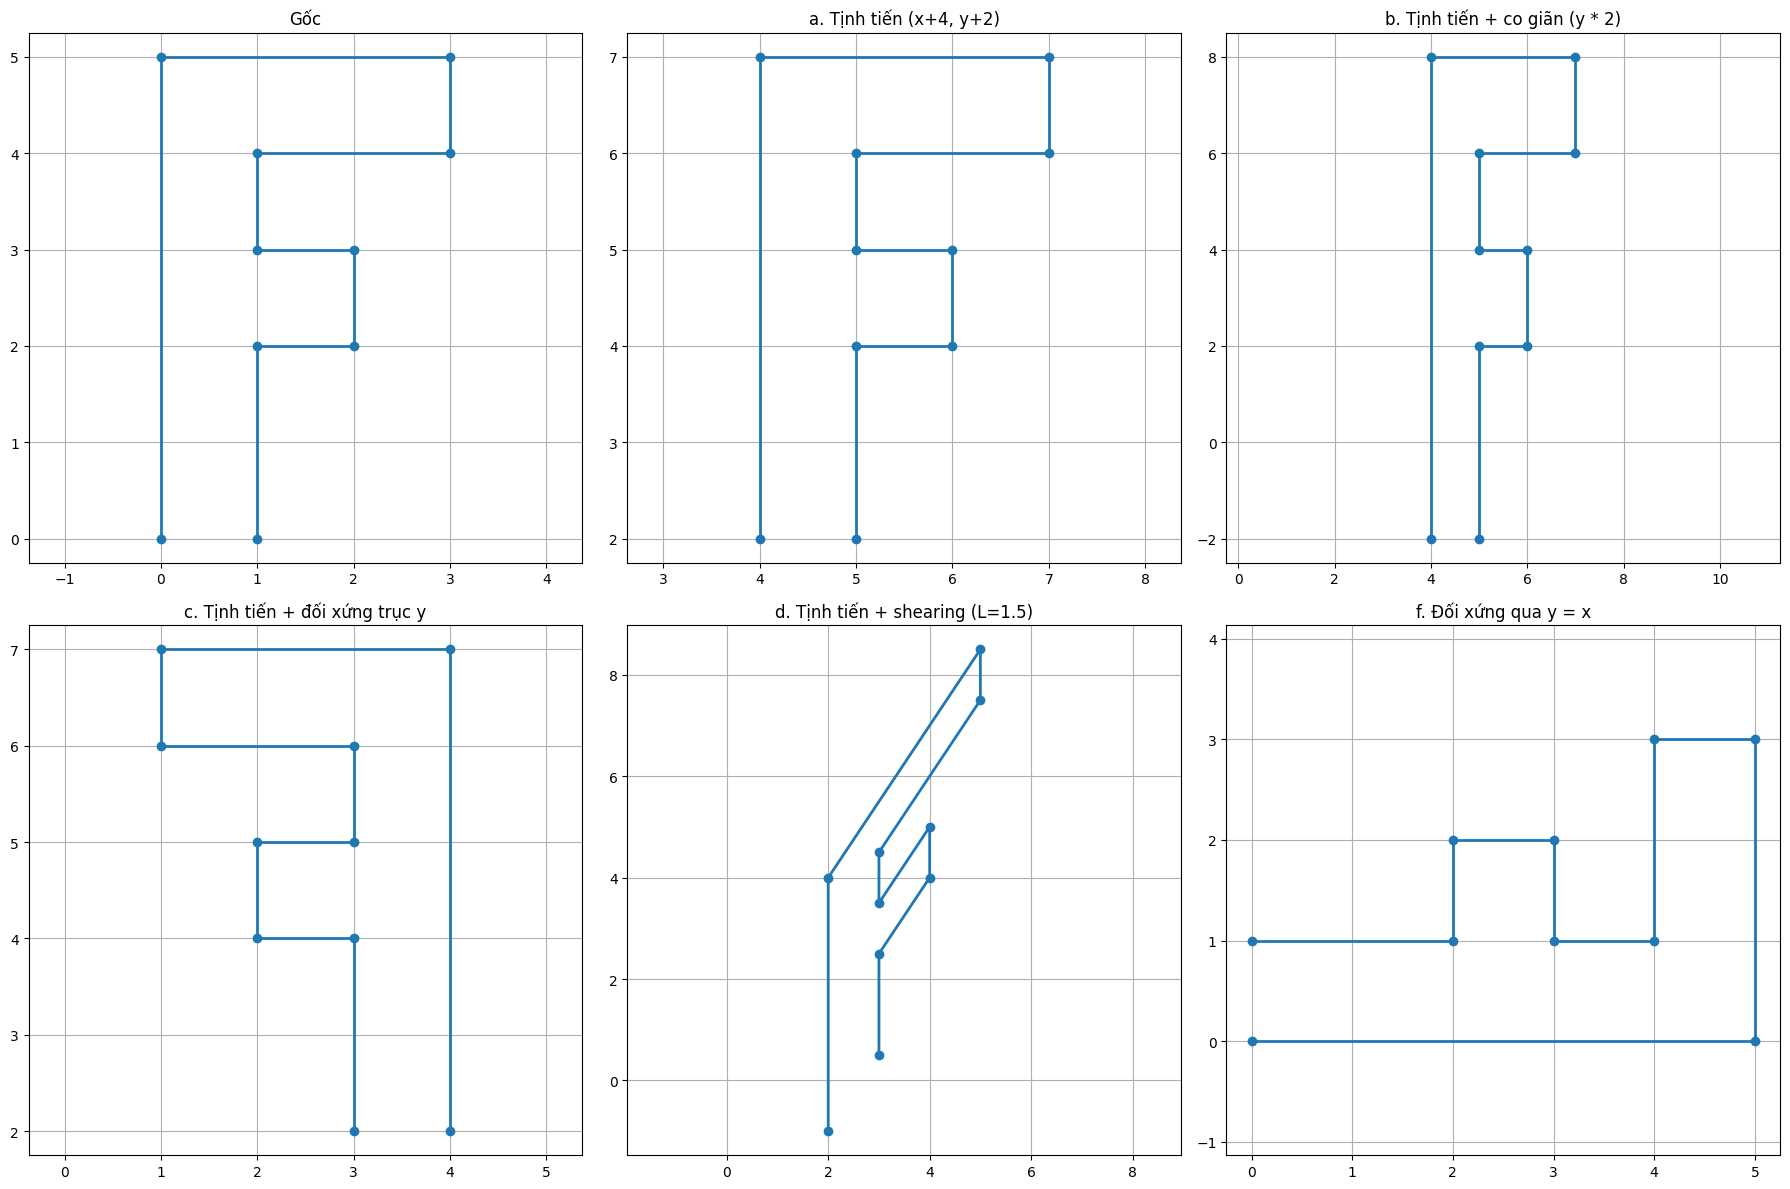

a. Tịnh tiến:
 [[4 4 7 7 5 5 6 6 5 5]
 [2 7 7 6 6 5 5 4 4 2]]
b. Co giãn:
 [[ 4.  4.  7.  7.  5.  5.  6.  6.  5.  5.]
 [-2.  8.  8.  6.  6.  4.  4.  2.  2. -2.]]
c. Đối xứng y:
 [[4. 4. 1. 1. 3. 3. 2. 2. 3. 3.]
 [2. 7. 7. 6. 6. 5. 5. 4. 4. 2.]]
d. Shearing:
 [[ 2.   2.   5.   5.   3.   3.   4.   4.   3.   3. ]
 [-1.   4.   8.5  7.5  4.5  3.5  5.   4.   2.5  0.5]]
e. Đối xứng trục y:
 [[ 0.  0. -3. -3. -1. -1. -2. -2. -1. -1.]
 [ 0.  5.  5.  4.  4.  3.  3.  2.  2.  0.]]
f. Đối xứng qua y = x:
 [[0. 5. 5. 4. 4. 3. 3. 2. 2. 0.]
 [0. 0. 3. 3. 1. 1. 2. 2. 1. 1.]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dữ liệu hình chữ F gốc
P = np.array([
    [0, 0, 3, 3, 1, 1, 2, 2, 1, 1],   # x
    [0, 5, 5, 4, 4, 3, 3, 2, 2, 0]    # y
])

def draw_points(P, title=""):
    plt.plot(P[0], P[1], 'o-', linewidth=2)
    plt.axis('equal')
    plt.title(title)
    plt.grid(True)

# a. Tịnh tiến (x + 4, y + 2)
vecdelta_a = np.array([4, 2])
P_a = (P.T + vecdelta_a).T

# b. Tịnh tiến (4, -2) và co giãn (x giữ nguyên, y * 2)
vecdelta_b = np.array([4, -2])
mat_b = np.array([[1.0, 0.0], [0.0, 2.0]])
P_b = (P.T @ mat_b + vecdelta_b).T

# c. Tịnh tiến (4, 2) và đối xứng qua trục y (x -> -x)
vecdelta_c = np.array([4, 2])
mat_c = np.array([[-1.0, 0.0], [0.0, 1.0]])
P_c = (P.T @ mat_c + vecdelta_c).T

# d. Shearing: (x + L*y + dx, M*x + y + dy)
L = 1.5
M = 0
vecdelta_d = np.array([2, -1])
mat_d = np.array([[1.0, L], [M, 1.0]])
P_d = (P.T @ mat_d + vecdelta_d).T

# e. Đối xứng qua trục y (x -> -x, y giữ nguyên)
mat_sym_y = np.array([[-1.0, 0.0], [0.0, 1.0]])
P_sym_y = (P.T @ mat_sym_y).T

# f. Đối xứng qua đường y = x
mat_sym_diag = np.array([[0.0, 1.0], [1.0, 0.0]])
P_sym_diag = (P.T @ mat_sym_diag).T

# Vẽ tất cả kết quả
plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
draw_points(P, "Gốc")

plt.subplot(2, 3, 2)
draw_points(P_a, "a. Tịnh tiến (x+4, y+2)")

plt.subplot(2, 3, 3)
draw_points(P_b, "b. Tịnh tiến + co giãn (y * 2)")

plt.subplot(2, 3, 4)
draw_points(P_c, "c. Tịnh tiến + đối xứng trục y")

plt.subplot(2, 3, 5)
draw_points(P_d, "d. Tịnh tiến + shearing (L=1.5)")

plt.subplot(2, 3, 6)
draw_points(P_sym_diag, "f. Đối xứng qua y = x")

plt.tight_layout()
plt.show()

# In kết quả tọa độ các phép biến đổi (nếu cần)
print("a. Tịnh tiến:\n", P_a)
print("b. Co giãn:\n", P_b)
print("c. Đối xứng y:\n", P_c)
print("d. Shearing:\n", P_d)
print("e. Đối xứng trục y:\n", P_sym_y)
print("f. Đối xứng qua y = x:\n", P_sym_diag)

3. [Đọc thêm] Kiểm lý thuyết về ánh xạ tuyến tính


 3.1. Kiểm tra một ánh xạ là ánh xạ tuyến tính

In [14]:
import sympy as sp
from sympy import lambdify

x1, x2, x3 = sp.symbols('x1 x2 x3')
a, b, c = sp.symbols('a b c')
d, e, f = sp.symbols('d e f')
q = sp.symbols('q')

bieuthuc1 = x1 - x2 + x3
f1 = lambdify([x1, x2, x3], bieuthuc1, 'sympy')

f1_a = f1(a, b, c)              # = a - b + c
f1_d = f1(d, e, f)              # = d - e + f
f1_sum = f1(a + d, b + e, c + f)  # = a - b + c + d - e + f

kiem_1 = (f1(a, b, c) + f1(d, e, f)).equals(f1_sum)      # ✅ True
kiem_2 = (q*f1(a, b, c) + f1(d, e, f)).equals(f1(q*a + d, q*b + e, q*c + f).expand())  # ✅ True

bieuthuc2 = 2*x1 + 3*x2
f2 = lambdify([x1, x2, x3], bieuthuc2, 'sympy')
kiem_3 = (q*f2(a,b,c) + f2(d,e,f)).equals(f2(q*a + d, q*b + e, q*c + f).expand())  # ✅ True

3.2. Tìm tổ hợp tuyến tính cho ánh xạ tuyến tính

In [13]:
a1, b1 = sp.symbols('a1 b1')
sol_linear_comb = sp.solve([a1 + 3*b1 - 4, 2*a1 + 5*b1 - 5], [a1, b1])
# => {a1: -5, b1: 3}

fu1 = sp.Matrix([1, 1, 2])
fu2 = sp.Matrix([4, 2, 1])
a1_val = -5
b1_val = 3
f_result = a1_val*fu1 + b1_val*fu2
# => Matrix([[7], [1], [-7]])

 3.3. Tìm ánh xạ tuyến tính f(x,y)

In [15]:
x, y = sp.symbols('x y')
a, b = sp.symbols('a b')
sol_map = sp.solve([a + 3*b - x, 2*a + 5*b - y], [a, b])
# => {a: -5x + 3y, b: 2x - y}

fu1 = sp.Matrix([1, 1, 2])
fu2 = sp.Matrix([4, 2, 1])
fu_expr = (-5*x + 3*y)*fu1 + (2*x - y)*fu2
# => Matrix([[3*x - y], [-x + y], [-8*x + 5*y]])

3.4. Tìm nhân của ánh xạ tuyến tính

In [11]:
# f(x1,x2,x3) = (x1+x2−x3; 2x1+3x2−x3; 3x1+5x2−x3)

x1, x2, x3 = sp.symbols('x1 x2 x3')
ker_sol = sp.solve([x1 + x2 - x3, 2*x1 + 3*x2 - x3, 3*x1 + 5*x2 - x3], [x1, x2, x3])
# => {x1: 2*x3, x2: -x3}

3.6. Ma trận của ánh xạ tuyến tính trong cặp cơ sở

In [10]:
v1_image = sp.Matrix([-2, -1])
v2_image = sp.Matrix([1, 1])
s1, t1 = sp.symbols('s1 t1')
sol_1 = sp.solve([s1 + t1 + 2, 2*s1 + 3*t1 + 1], [s1, t1])  # => {-5, 3}
col1 = sp.Matrix([-5, 3])

s2, t2 = sp.symbols('s2 t2')
sol_2 = sp.solve([s2 + t2 - 1, 2*s2 + 3*t2 - 1], [s2, t2])  # => {2, -1}
col2 = sp.Matrix([2, -1])
matrix_A = sp.Matrix.hstack(col1, col2)

BÀI TẬP CHƯƠNG 8

In [9]:
#  Câu 1: Kiểm tra ánh xạ tuyến tính
import sympy as sp

# Khai báo biến
x, y, z = sp.symbols('x y z')
a, b, c = sp.symbols('a b c')
k = sp.symbols('k')  # hệ số vô hướng

# Định nghĩa ánh xạ
T = lambda u, v, w: sp.Matrix([u + v, w + 2, 0])

# Kiểm tra tính cộng
v1 = T(x, y, z)
v2 = T(a, b, c)
add_check = T(x + a, y + b, z + c) == v1 + v2
print("T(x+y) = T(x) + T(y)?", add_check)

# Kiểm tra tính nhân vô hướng
scalar_check = T(k * x, k * y, k * z) == k * T(x, y, z)
print("T(kx) = kT(x)?", scalar_check)

# Câu 2: Biến đổi x thành y và y thành x - y
# python
# Sao chép
# Chỉnh sửa

import numpy as np

# Tập điểm chữ F (ví dụ bạn có thể thay thế bằng tập khác)
F = np.array([[0,0,3,3,1,1,2,2,1,1],
              [0,5,5,4,4,3,3,2,2,0]])

# Ma trận biến đổi: x → y, y → x - y
A = np.array([[0, 1],
              [1, -1]])

# Biến đổi
F_transformed = (F.T @ A).T
print("Biến đổi F:\n", F_transformed)

# Câu 3: Chứng minh ánh xạ là tuyến tính

# Biến hình thức
x1, x2 = sp.symbols('x1 x2')
a, b = sp.symbols('a b')
c, d = sp.symbols('c d')
q = sp.symbols('q')

# Định nghĩa ánh xạ
f1 = x1 - x2
f2 = x1 + 2*x2

# Kiểm tra tuyến tính
v1 = (f1.subs({x1: a, x2: b}), f2.subs({x1: a, x2: b}))
v2 = (f1.subs({x1: c, x2: d}), f2.subs({x1: c, x2: d}))
v_sum = (f1.subs({x1: a+c, x2: b+d}), f2.subs({x1: a+c, x2: b+d}))
print("Cộng đúng?", v_sum == (v1[0]+v2[0], v1[1]+v2[1]))

# Nhân vô hướng
v_scalar = (f1.subs({x1: q*a, x2: q*b}), f2.subs({x1: q*a, x2: q*b}))
expected = (q*v1[0], q*v1[1])
print("Nhân vô hướng đúng?", v_scalar == expected)

# Câu 4: Dạng toàn phương (quadratic form)

from sympy import Matrix, symbols, Eq, solve
import numpy as np
from scipy.linalg import eig

# Ma trận A
A = np.array([[13, -5],
              [-5, 13]])

# Giá trị riêng và vector riêng
eigenvalues, eigenvectors = eig(A)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors (cột):\n", eigenvectors)

# Góc xoay là arccos(dot([1,0], v)) nếu cần


T(x+y) = T(x) + T(y)? False
T(kx) = kT(x)? False
Biến đổi F:
 [[ 0  5  5  4  4  3  3  2  2  0]
 [ 0 -5 -2 -1 -3 -2 -1  0 -1  1]]
Cộng đúng? True
Nhân vô hướng đúng? False
Eigenvalues: [18.+0.j  8.+0.j]
Eigenvectors (cột):
 [[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


4. Bài toán ứng dụng: Đường conic và các phép biến đổi

In [16]:
import numpy as np
import sympy as sp
from sympy import sin, cos, simplify, Matrix, sqrt, symbols, expand

# Bước 1: Khai báo biến
x, y = sp.symbols('x y')
xs, ys = sp.symbols("xs ys")  # biến trong hệ mới sau xoay

# Bước 2: Góc xoay theta (xoay sao cho bỏ xy): tan(2θ) = B / (A - C)
A, B, C = 5, -6, 5
theta = sp.Rational(1, 2) * sp.atan2(B, A - C)
print("Góc xoay (radian):", theta)

# Tính cosθ, sinθ
cos_theta = sp.cos(theta)
sin_theta = sp.sin(theta)

# Bước 3: Biến đổi x, y sang tọa độ mới (xs, ys)
x_rot = cos_theta * xs - sin_theta * ys
y_rot = sin_theta * xs + cos_theta * ys

# Bước 4: Phương trình conic ban đầu
expr = A*x**2 + B*x*y + C*y**2 + 14*sp.sqrt(2)*x - 2*sp.sqrt(2)*y + 18

# Thay x, y bằng biến đổi mới:
expr_rot = expr.subs({x: x_rot, y: y_rot})
expr_rot = sp.expand(expr_rot)

print("Phương trình sau khi xoay:\n", simplify(expr_rot))

Góc xoay (radian): -pi/4
Phương trình sau khi xoay:
 8*xs**2 + 16*xs + 2*ys**2 + 12*ys + 18
